In [41]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from wordcloud import WordCloud,ImageColorGenerator

In [43]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/aniket/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [44]:
df = pd.read_csv("kanye_west_lyrics.csv")

In [45]:
pd.options.display.max_colwidth = 200
df.head()

,album,song,lyric,year
0,College Dropout,Intro,". . . . Kanye, can I talk to you for a minute?. . Me and the other faculty members was wonderin could you do a lil som.... . Somethin beautiful. . Somethin that the kids is gon love when they hear...",2004
1,College Dropout,We Don't Care,. . . . . . And all my people thats drug dealin jus to get by stack ya money till it gets sky high. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands u...,2004
2,College Dropout,Graduation Day,". . . . What in the fuck was that Kanye. . I told you to do some shit for the kids. . You can give me your muthafucking graduation ticket right now. . You will not walk across that stage, you won’...",2004
3,College Dropout,All Falls Down,". . . . . . Oh when it all, it all falls down. . I'm telling you ohh, it all falls down. . Man I promise, she's so self conscious. . She has no idea what she's doing in college. . That major that ...",2004
4,College Dropout,I'll Fly Away,". . . . Some glad morning when this life is over,. . I'll fly away.. . To a home on God's celestial shore,. . I'll fly away.. . I'll fly away, O Glory,. . I'll fly away.. . When I die, Hallelujah,...",2004


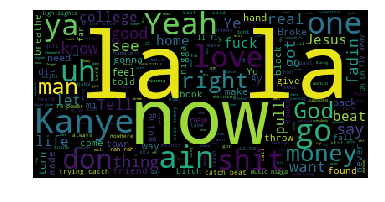

In [46]:
letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(df['lyric']))
wc = WordCloud().generate(letters_only)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [47]:
stop_words=stopwords.words("english")

In [48]:
stop_words.extend(['niggas','nigga','fuck','shit','back','come','things','get','uh','la','ya','oh','yeah','place','bitch','would','like','know','stay','go','let','cause'])


In [53]:
from nltk.tokenize import word_tokenize 
  
example_sent = letters_only
    
word_tokens = word_tokenize(example_sent) 
  
filtered_lyrics = [w for w in word_tokens if not w in stop_words] 
  
filtered_lyrics = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_lyrics.append(w) 



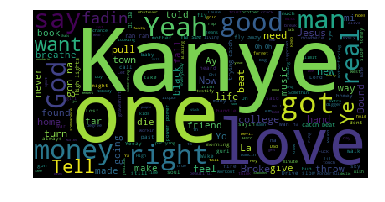

In [55]:
letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_lyrics))
wc = WordCloud().generate(letters_only)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [56]:
stop_words.extend(['Kanye','Yeah','got'])

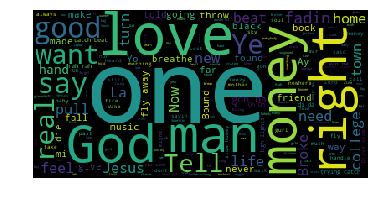

In [57]:
from nltk.tokenize import word_tokenize 
  
example_sent = letters_only
    
word_tokens = word_tokenize(example_sent) 
  
filtered_lyrics = [w for w in word_tokens if not w in stop_words] 
  
filtered_lyrics = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_lyrics.append(w) 

letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_lyrics))
wc = WordCloud().generate(letters_only)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [24]:
vectorizer = TfidfVectorizer(stop_words = stop_words , min_df= 0.01)

In [25]:
tfidf = vectorizer.fit_transform(df['lyric'])

In [26]:
nmf = NMF(n_components = 6)

In [27]:
topic_values = nmf.fit_transform(tfidf)

In [28]:
for topic_num, topic in enumerate(nmf.components_): 
    message = "Topic #{}: ".format(topic_num + 1) 
    message += " ".join([vectorizer.get_feature_names()[i] for i in topic.argsort()[:-11 :-1]])
    print(message)

Topic #1: right got see need one man never god tell make
Topic #2: goodbye love winter coldest friend away memories ever made 4am
Topic #3: broke phi got afford gas cars brother kanye none ago
Topic #4: hey college classes secretary degree money smart extra level school
Topic #5: lights america night survive flashing baby want mind life world
Topic #6: forever ever diamonds could chain sayin leone conflict sierra connect


In [29]:
topic_labels = ['God','Love','Money','College','Partying','Social Issues']

In [30]:
df_topics = pd.DataFrame(topic_values,columns= topic_labels)
df_topics

,God,Love,Money,College,Partying,Social Issues
0,0.056679,0.033452,0.030958,0.010066,0.000000,0.029519
1,0.141949,0.000000,0.018295,0.133332,0.000000,0.044269
2,0.110360,0.000000,0.014484,0.012082,0.000000,0.000000
3,0.135447,0.000000,0.016589,0.048117,0.000000,0.022963
4,0.015895,0.186297,0.000000,0.000000,0.000000,0.014532
5,0.167595,0.060445,0.000000,0.014568,0.000000,0.030250
6,0.121325,0.002050,0.000000,0.028881,0.000000,0.008605
7,0.216944,0.005435,0.001117,0.000000,0.000000,0.020222
8,0.211810,0.007433,0.013917,0.019138,0.000000,0.000000
9,0.100207,0.005444,0.020275,0.016369,0.000000,0.000000


In [31]:
df = df.join(df_topics)
df.head()

,album,song,lyric,year,God,Love,Money,College,Partying,Social Issues
0,College Dropout,Intro,". . . . Kanye, can I talk to you for a minute?. . Me and the other faculty members was wonderin could you do a lil som.... . Somethin beautiful. . Somethin that the kids is gon love when they hear...",2004,0.056679,0.033452,0.030958,0.010066,0.0,0.029519
1,College Dropout,We Don't Care,. . . . . . And all my people thats drug dealin jus to get by stack ya money till it gets sky high. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands u...,2004,0.141949,0.000000,0.018295,0.133332,0.0,0.044269
2,College Dropout,Graduation Day,". . . . What in the fuck was that Kanye. . I told you to do some shit for the kids. . You can give me your muthafucking graduation ticket right now. . You will not walk across that stage, you won’...",2004,0.110360,0.000000,0.014484,0.012082,0.0,0.000000
3,College Dropout,All Falls Down,". . . . . . Oh when it all, it all falls down. . I'm telling you ohh, it all falls down. . Man I promise, she's so self conscious. . She has no idea what she's doing in college. . That major that ...",2004,0.135447,0.000000,0.016589,0.048117,0.0,0.022963
4,College Dropout,I'll Fly Away,". . . . Some glad morning when this life is over,. . I'll fly away.. . To a home on God's celestial shore,. . I'll fly away.. . I'll fly away, O Glory,. . I'll fly away.. . When I die, Hallelujah,...",2004,0.015895,0.186297,0.000000,0.000000,0.0,0.014532


In [32]:
for label in topic_labels: 
    df.loc[df[label] >= .1, label] = 1 
    df.loc[df[label] < .1, label] = 0

In [33]:
df.head()

,album,song,lyric,year,God,Love,Money,College,Partying,Social Issues
0,College Dropout,Intro,". . . . Kanye, can I talk to you for a minute?. . Me and the other faculty members was wonderin could you do a lil som.... . Somethin beautiful. . Somethin that the kids is gon love when they hear...",2004,0.0,0.0,0.0,0.0,0.0,0.0
1,College Dropout,We Don't Care,. . . . . . And all my people thats drug dealin jus to get by stack ya money till it gets sky high. . We wasnt supposed to make it past 25 but the jokes on you we still alive. . Throw your hands u...,2004,1.0,0.0,0.0,1.0,0.0,0.0
2,College Dropout,Graduation Day,". . . . What in the fuck was that Kanye. . I told you to do some shit for the kids. . You can give me your muthafucking graduation ticket right now. . You will not walk across that stage, you won’...",2004,1.0,0.0,0.0,0.0,0.0,0.0
3,College Dropout,All Falls Down,". . . . . . Oh when it all, it all falls down. . I'm telling you ohh, it all falls down. . Man I promise, she's so self conscious. . She has no idea what she's doing in college. . That major that ...",2004,1.0,0.0,0.0,0.0,0.0,0.0
4,College Dropout,I'll Fly Away,". . . . Some glad morning when this life is over,. . I'll fly away.. . To a home on God's celestial shore,. . I'll fly away.. . I'll fly away, O Glory,. . I'll fly away.. . When I die, Hallelujah,...",2004,0.0,1.0,0.0,0.0,0.0,0.0


In [34]:
year_topics = df.groupby('year').sum().reset_index()

In [35]:
year_topics

,year,God,Love,Money,College,Partying,Social Issues
0,2004,14.0,1.0,0.0,5.0,0.0,0.0
1,2005,11.0,0.0,5.0,1.0,1.0,4.0
2,2007,10.0,2.0,0.0,1.0,2.0,0.0
3,2008,6.0,3.0,0.0,1.0,1.0,0.0
4,2010,9.0,0.0,0.0,1.0,4.0,1.0
5,2011,14.0,1.0,0.0,0.0,1.0,0.0
6,2012,8.0,1.0,0.0,0.0,0.0,0.0
7,2013,7.0,0.0,0.0,0.0,0.0,0.0
8,2016,11.0,0.0,1.0,0.0,1.0,1.0


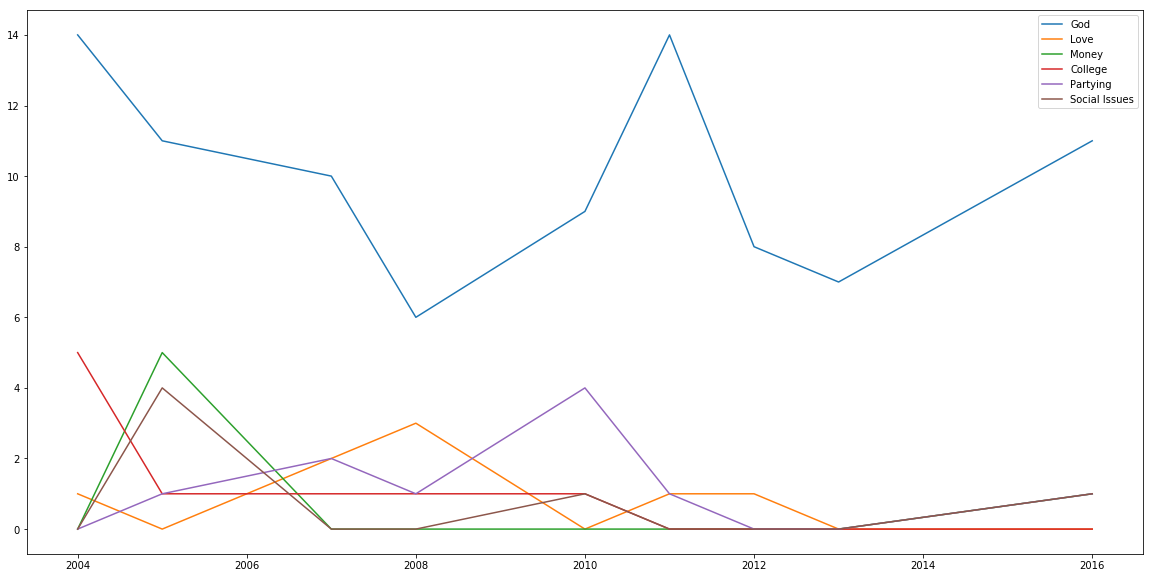

In [36]:
plt.figure(figsize=(20,10))
plt.plot(year_topics['year'],year_topics['God'],label = 'God')
plt.plot(year_topics['year'],year_topics['Love'],label = 'Love')
plt.plot(year_topics['year'],year_topics['Money'],label = 'Money')
plt.plot(year_topics['year'],year_topics['College'],label = 'College')
plt.plot(year_topics['year'],year_topics['Partying'],label = 'Partying')
plt.plot(year_topics['year'],year_topics['Social Issues'],label = 'Social Issues')
plt.legend()